# 숙제

In [ ]:
* 멜스펙트럼이 뭐야  
* 그래서 지금 뭘 하는거야  
* FFT가 뭐야  
* 논문 : 타코트론, 타코트론2 ...  

# Librosa

Librosa는 realtime으로 볼 수 있다.  
반면 plt로 하면 realtime으로는 볼 수 없고, sample 개수가 x축에 그려진다.  

## Librosa로 그려보기

In [2]:
# pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 24.2 MB/s eta 0:00:0000:0100:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23704 sha256=d34f51727df42678b41b3da08db745e0b0af15fc9db99af63a098ec83a6cbc97
  Stored in directory: /Users/jongya/Library/Caches/pip/wheels/74/25/48/ad94b69151b78e9aeba6850da119f04eda1c811d22fcf4b32d
Successfully built audioread
  Attempting uninstall: numpy
    Found existing in

In [1]:
import matplotlib.pyplot as plt
import librosa.display
import soundfile
import numpy as np
import IPython.display

In [2]:
sound_contents, file_sampling_rate = soundfile.read('schoolbell_plain.wav')

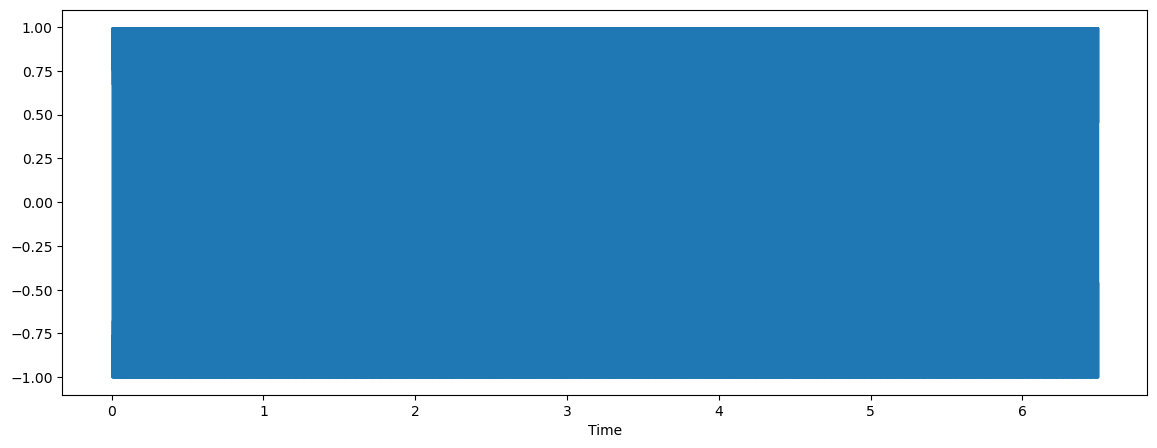

In [25]:
# 불러온 사운드파일의 파형 보기
## 너무 오밀조밀하게 모여있어서 꽉 찬 직사각형으로 보임
plt.figure(figsize = (14, 5))
librosa.display.waveshow(sound_contents, sr = file_sampling_rate)

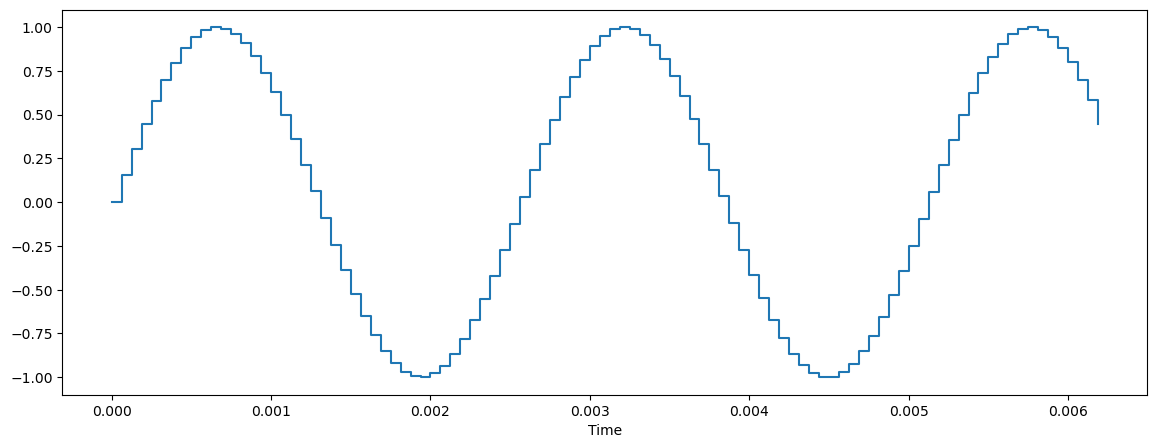

In [3]:
# 불러온 사운드파일의 파형 보기 : 앞 부분만
plt.figure(figsize = (14, 5))
librosa.display.waveshow(sound_contents[:100], sr = file_sampling_rate)

1사이클만 그려보기

In [4]:
# 주파수 정의

pitch_do = 261.6256
pitch_re = 293.6648
pitch_mi = 329.6276
pitch_fa = 349.2282
pitch_sol = 391.9954
pitch_la = 440.0000
pitch_ti = 493.883
pitch_none = 0.0

In [5]:
sr = 16000 # sampling rate
T = 2.0    # running time
           ## 1초에 16000개, 총 2초면 32000개 sample 존재
amp = 1.0
t = np.linspace(0, T, int(T*sr))    # 32000개의 신호 제작

y_do = amp * np.sin(2 * np.pi * pitch_do * t)   # 주파수 적용한 신호
y_re = amp * np.sin(2 * np.pi * pitch_re * t)   # 주파수 적용한 신호
y_mi = amp * np.sin(2 * np.pi * pitch_mi * t)   # 주파수 적용한 신호
y_fa = amp * np.sin(2 * np.pi * pitch_fa * t)   # 주파수 적용한 신호
y_sol = amp * np.sin(2 * np.pi * pitch_sol * t) # 주파수 적용한 신호
y_la = amp * np.sin(2 * np.pi * pitch_la * t)   # 주파수 적용한 신호
y_ti = amp * np.sin(2 * np.pi * pitch_ti * t)   # 주파수 적용한 신호

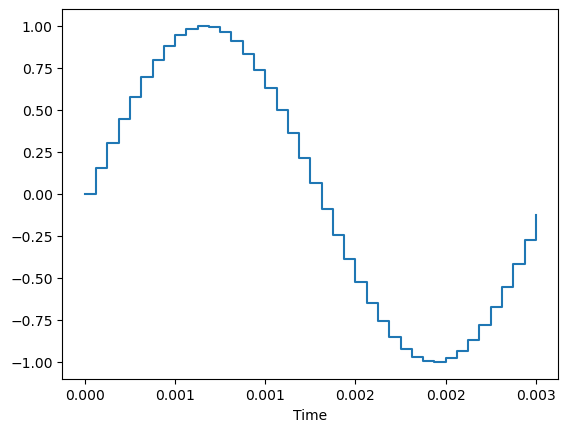

In [6]:
# 한 주기만 보기
a_cycle_time = int(file_sampling_rate/pitch_sol) + 1
librosa.display.waveshow(sound_contents[:a_cycle_time], sr = file_sampling_rate)

## matplotlib으로 그려보면?

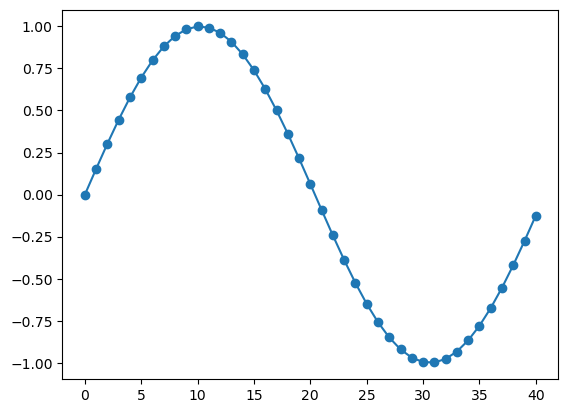

In [7]:
plt.plot(sound_contents[:a_cycle_time], "o-")
plt.show()

## FFT

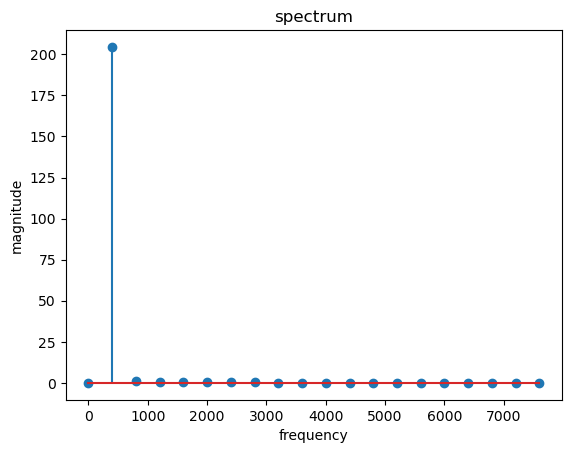

In [27]:
X = np.fft.fft(sound_contents[:a_cycle_time]*10) # 10ms
mag = np.abs(X)                                  # magnitude : 진폭
f = np.linspace(0, file_sampling_rate, len(mag))
f_left = f[:int(len(mag)/2)]                     # 주파수는 대칭임. 그러므로 반만 fft해도 됨
spectrum_X = mag[:int(len(mag)/2)]               # 주파수 스펙트럼

plt.stem(f_left, spectrum_X, 'o-')               # stem : 일반적인 선형 그래프가 아닌,
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('spectrum')
plt.show()

보면, 소리가 있는 sol 주파수 뿐만 아니라, 그 다음 주파수도 약간 값이 있다.  
이는, 자연스러운 현상으로 '배음' 현상인 것.

In [9]:
spectrum_X

array([1.23596191e-01, 2.04523227e+02, 1.26671764e+00, 7.14970734e-01,
       5.11691226e-01, 4.02647597e-01, 3.35579592e-01, 2.88834224e-01,
       2.55350541e-01, 2.30092000e-01, 2.11042737e-01, 1.95020868e-01,
       1.82746535e-01, 1.72020343e-01, 1.65670920e-01, 1.58567331e-01,
       1.53662277e-01, 1.50407379e-01, 1.47889283e-01, 1.45917565e-01])

## librosa.stft, display.specshow

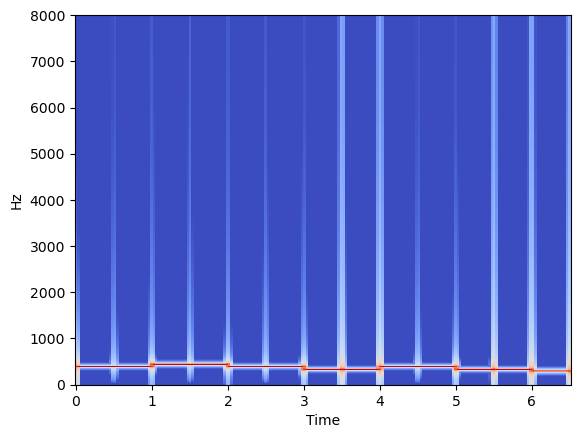

In [10]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X))
# amplitude : 진폭
# db : 데시벨

librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='hz')

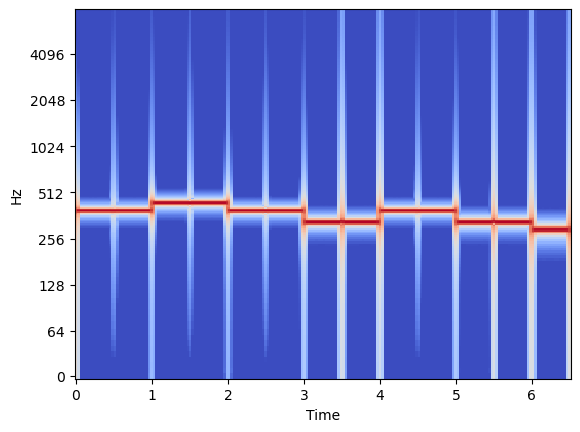

In [11]:
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
# log scale 을 사용하면,
# 아래위 남는 여백 없이, 주요 부분들에 집중해서 볼 수 있음



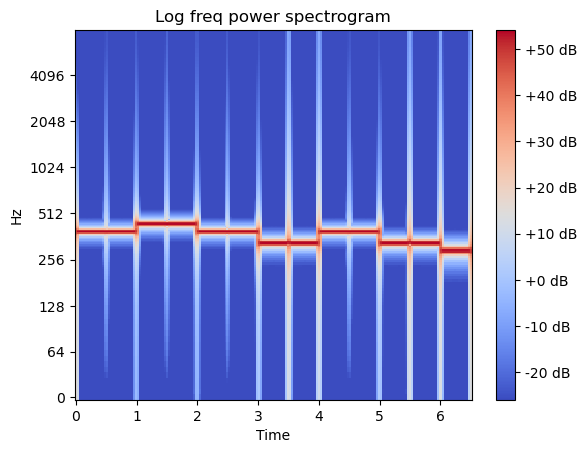

In [12]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X))
# amplitude : 진폭
# db : 데시벨
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
plt.title('Log freq power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

# db별로 그릴 수 있음
# -> 근데 이는 '기준'이 없음

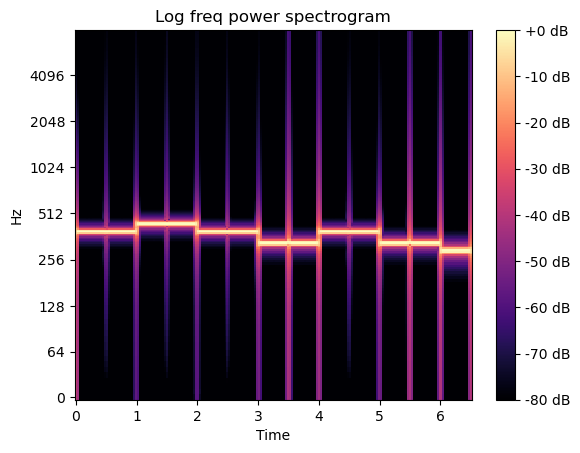

In [13]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X), ref=np.max) # 기준을 잡아줌 : max인 0db부터 아래로 내려가게끔
# 0db를 기준으로 삼는 이유 : 위로 올라가면 소리가 깨질 수 있음.
# 제일 작은 소리를 0으로 두면, 소리가 무한으로 커지면 그것을 재현할 수 없음
# 그러나 제일 큰 소리를 0으로 기준을 두면, 그보다 작은 소리는 마이너스 하면 되므로 재현 가능

# amplitude : 진폭
# db : 데시벨
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
plt.title('Log freq power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

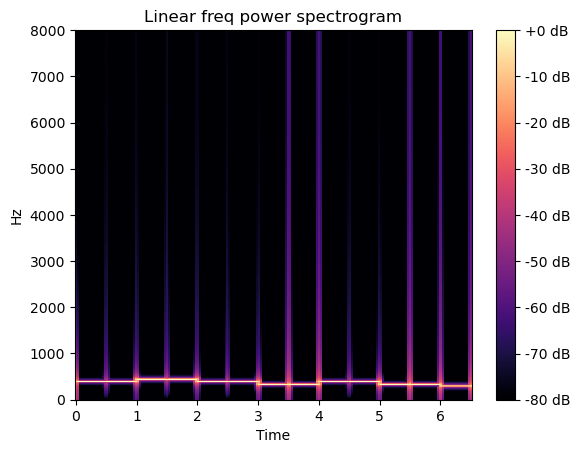

In [14]:
X = librosa.stft(sound_contents) # short time fourier transform


Xdb = librosa.amplitude_to_db(abs(X), ref=np.max) # 기준을 잡아줌 : max인 0db부터 아래로 내려가게끔

librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='linear')
plt.title('Linear freq power spectrogram')
# linear로 해보기
plt.colorbar(format='%+2.0f dB')
plt.show()

## MFCC (melspectrogram)

* 음역대를 n개로 나누어 데이터를 표시화는 것이 멜스펙트럼  
* 즉, 음역대를 몇 단계로 나누어 볼 것이냐  
* 사람의 청각세포의 개수는 한정이 되어있고, 느낄 수 있는 음간 차이는 한계가 있으므로  
* 사람이 들을 수 있는 음차의 한계에 맞춰 음역대를 맞추면, 빠른 연산과 충분한 성능이 나올 것이라는 것  
* 멜스펙트럼의 개수가 너무 많으면(세분화하면) 연산량이 많아지고  
* 멜스펙트럼의 개수가 너무 적으면(대략 잡으면 = 거칠어지면) 연산량은 적어지나, 제대로된 분류가 불가  

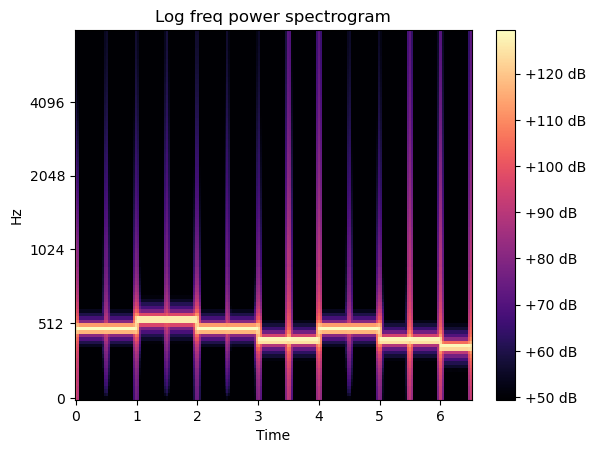

In [28]:
D = abs(librosa.stft(sound_contents)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
# signal = D / n_mels : n_mels레벨을 지정 : Hz 구간을 몇 개로 나눌지 정의
# 이 부분을 너무 약하게(적게) 잡으면 분석이 잘 안될 것이고 (장르구분 등에서)
# 이 부분을 너무 강하게(많이) 잡으면 분석하는 데 시간이 오래 걸리고...
# 그리고, 우리 귀는 엄청 자세하게 듣지는 못하므로 (청세포의 개수는 정해져있음),  
# 그에 충분한 숫자 만큼만을 지정하면 되지 않느냐 => 라는 것에서 시작된 것이 멜스펙트럼

mel_db = librosa.amplitude_to_db(mel_spec, ref=0.000001) # 0.000001

librosa.display.specshow(mel_db, sr=file_sampling_rate, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('Log freq power spectrogram')

plt.colorbar(format='%+2.0f dB')
plt.show()

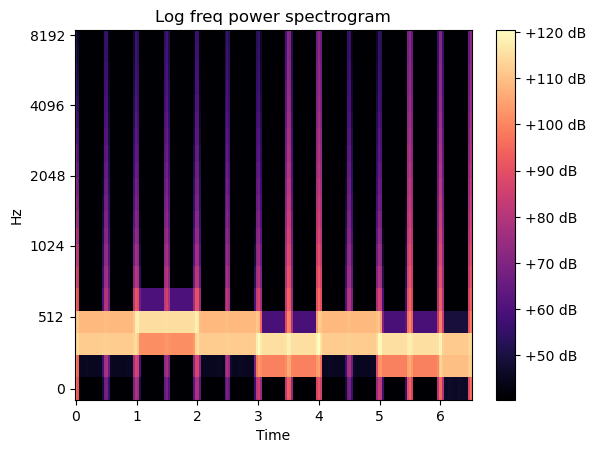

In [16]:
D = abs(librosa.stft(sound_contents)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=20) # melspectrogram 구하기
# signal = D / n_mels : n_mels레벨을 지정 : Hz 구간을 몇 개로 나눌지 정의
# 이 부분을 너무 약하게(적게) 잡으면 분석이 잘 안될 것이고 (장르구분 등에서)
# 이 부분을 너무 강하게(많이) 잡으면 분석하는 데 시간이 오래 걸리고...
# 그리고, 우리 귀는 엄청 자세하게 듣지는 못하므로 (청세포의 개수는 정해져있음),  
# 그에 충분한 숫자 만큼만을 지정하면 되지 않느냐 => 라는 것에서 시작된 것이 멜스펙트럼


mel_db = librosa.amplitude_to_db(mel_spec, ref=0.000001) # 0.000001

librosa.display.specshow(mel_db, sr=file_sampling_rate, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('Log freq power spectrogram')

plt.colorbar(format='%+2.0f dB')
plt.show()

# 아이우에오 (모음)

모든 파형은 삼각함수의 합으로 나타낼 수 있다.  
즉, 음파는 주파수대들의 조합으로 나타낼 수 있다.  

## 아이우에오 둘러보기

In [6]:
# 아이우에오 녹음 파일
import soundfile
import matplotlib.pyplot as plt
import librosa

sound_content, sample_rate = soundfile.read('aiwooeo.wav')

SystemError: initialization of _internal failed without raising an exception

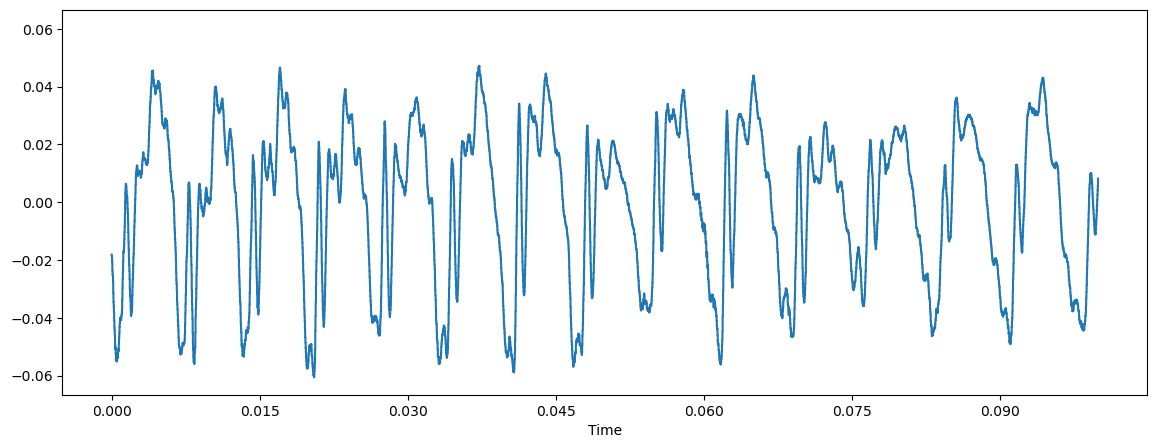

In [72]:
# 아 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 0.552
sound_ah = sound_content[int(start_sec*44100):int(start_sec*44100+4410)]
librosa.display.waveshow(ah, sr = sample_rate)

IPython.display.Audio(ah, rate = sample_rate)

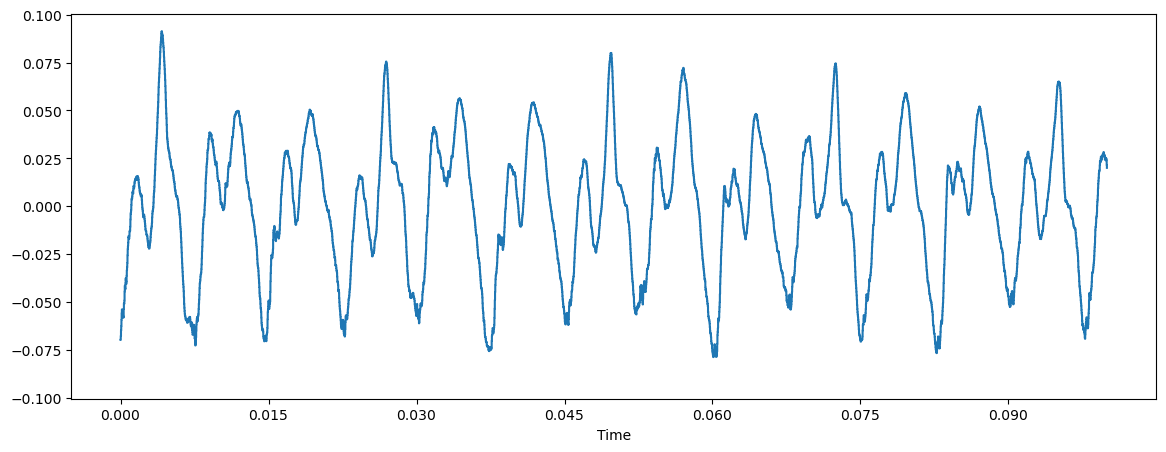

In [73]:
# 이 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 5.507
sound_ee = sound_content[int(start_sec*44100):int(start_sec*44100+4410)]
librosa.display.waveshow(ee, sr = sample_rate)

IPython.display.Audio(ee, rate = sample_rate)

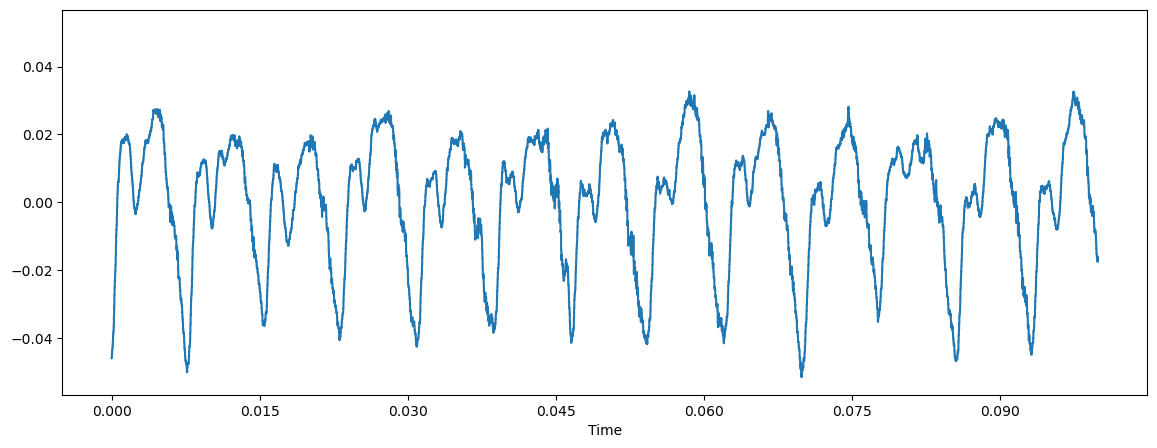

In [74]:
# 우~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 11.002
sound_woo = sound_content[int(start_sec*44100):int(start_sec*44100+4410)]
librosa.display.waveshow(woo, sr = sample_rate)

IPython.display.Audio(woo, rate = sample_rate)

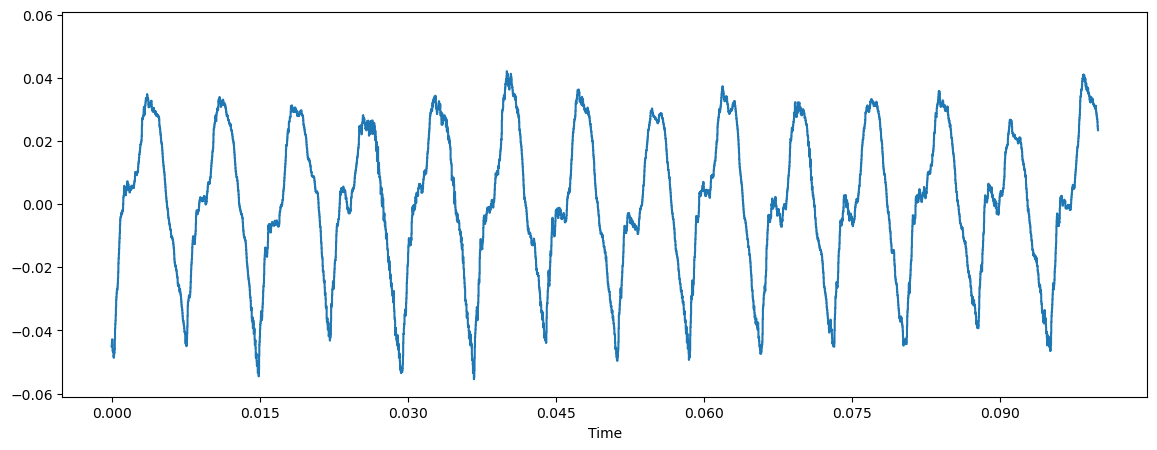

In [75]:
# 에~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 16.006
sound_e = sound_content[int(start_sec*44100):int(start_sec*44100+4410)]
librosa.display.waveshow(e, sr = sample_rate)

IPython.display.Audio(e, rate = sample_rate)

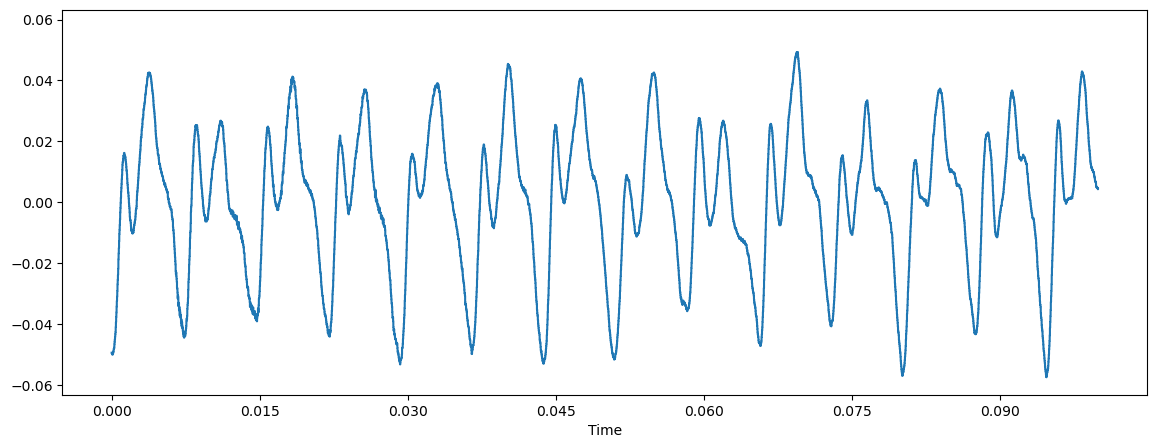

In [76]:
# 오~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 21.005
sound_oh = sound_content[int(start_sec*44100):int(start_sec*44100+4410)]
librosa.display.waveshow(oh, sr = sample_rate)

IPython.display.Audio(oh, rate = sample_rate)

## 더 자세하게 파형 둘러보기 (40ms)

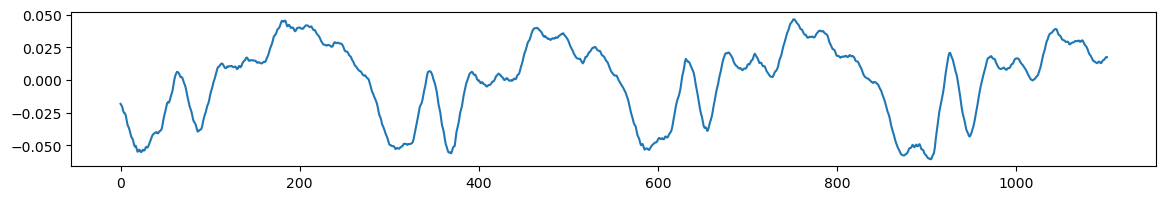

In [86]:
plt.figure(figsize = (14, 2))
leng_temp = int(len(sound_ah)/4)
plt.plot(range(leng_temp), sound_ah[:leng_temp])
plt.show()

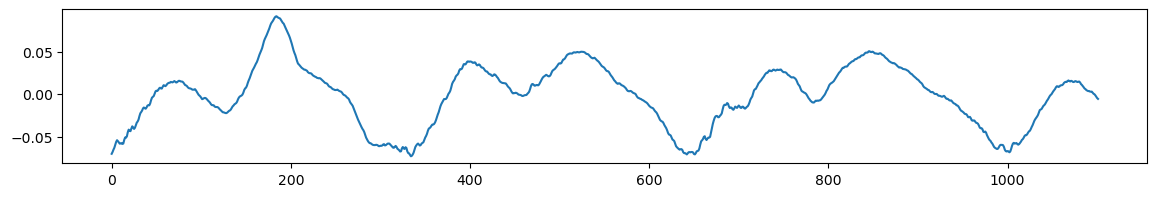

In [88]:
plt.figure(figsize = (14, 2))
leng_temp = int(len(sound_ee)/4)
plt.plot(range(leng_temp), sound_ee[:leng_temp])
plt.show()

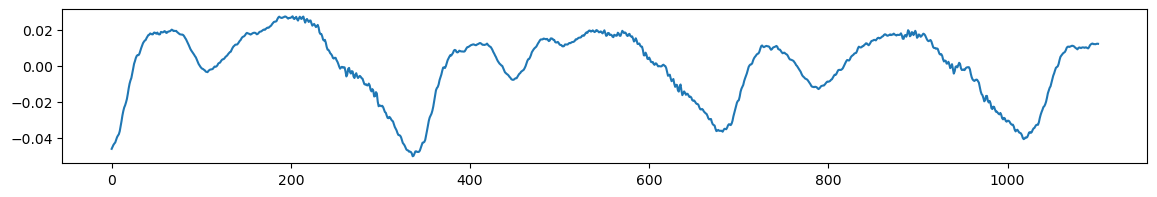

In [89]:
plt.figure(figsize = (14, 2))
leng_temp = int(len(sound_woo)/4)
plt.plot(range(leng_temp), sound_woo[:leng_temp])
plt.show()

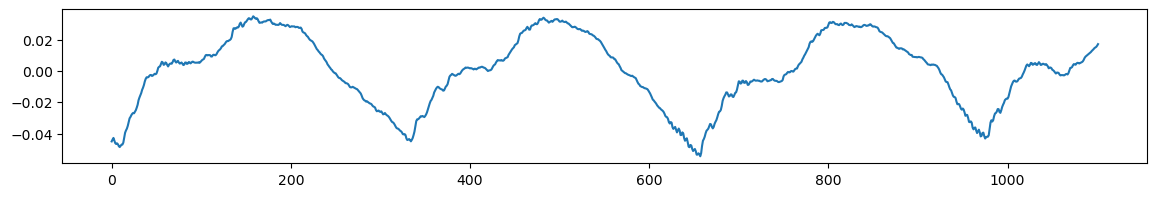

In [90]:
plt.figure(figsize = (14, 2))
leng_temp = int(len(sound_e)/4)
plt.plot(range(leng_temp), sound_e[:leng_temp])
plt.show()

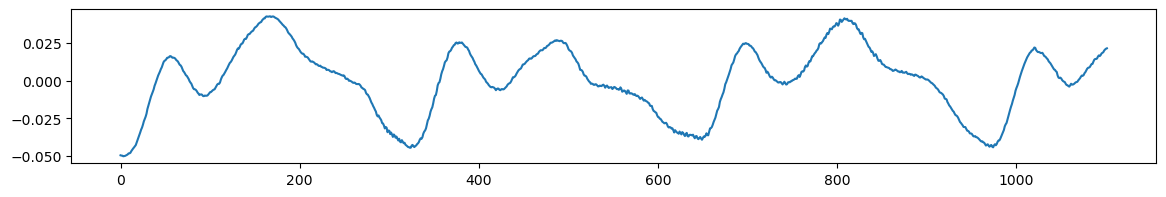

In [91]:
plt.figure(figsize = (14, 2))
leng_temp = int(len(sound_oh)/4)
plt.plot(range(leng_temp), sound_oh[:leng_temp])
plt.show()

## 주파수 분석

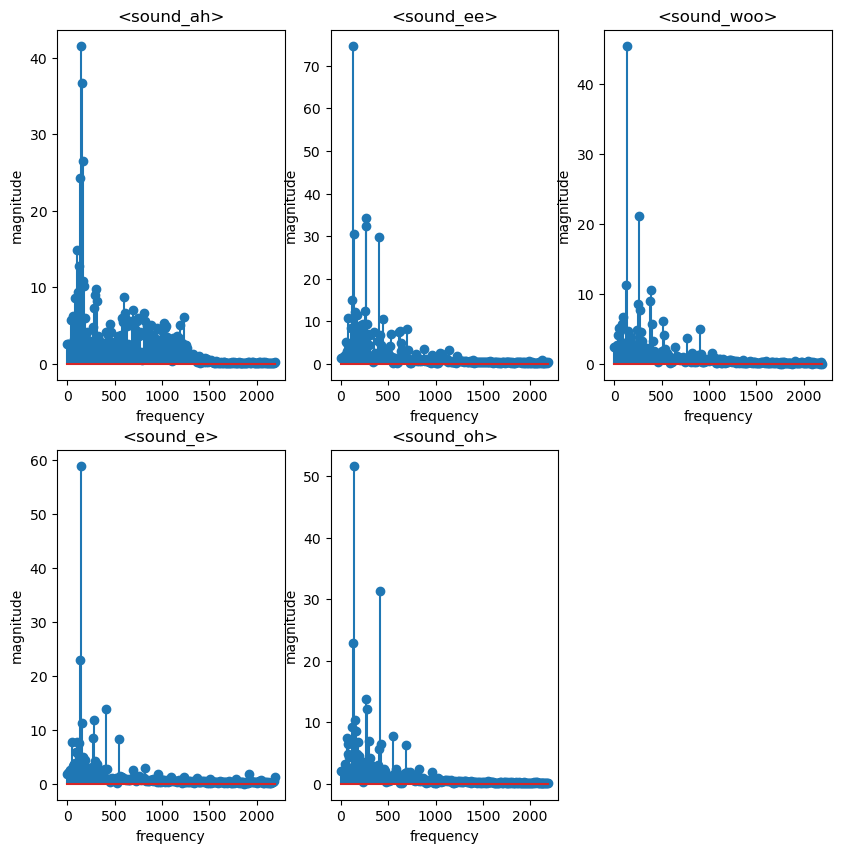

In [108]:
sounds = [sound_ah, sound_ee, sound_woo, sound_e, sound_oh]
sounds_title = ['<sound_ah>', '<sound_ee>', '<sound_woo>', '<sound_e>', '<sound_oh>']

plt.figure(figsize = (10, 10))

for i, item, title in zip(range(1, 6), sounds, sounds_title):
    fft_temp = np.fft.fft(item) # 10ms
    mag = np.abs(fft_temp)      # magnitude : 진폭
    f = np.linspace(0, sample_rate, len(mag))
    f_left = f[:int(len(mag)/20)]             # 주파수는 대칭임. 그러므로 반만 fft해도 됨
    spectrum = mag[:int(len(mag)/20)]       # 주파수 스펙트럼

    plt.subplot(2, 3, i)
    plt.stem(f_left, spectrum, 'o-')               # stem : 일반적인 선형 그래프가 아닌,
    plt.xlabel('frequency')
    plt.ylabel('magnitude')
    plt.title(title)
    
plt.show()

## 멜스펙트럼

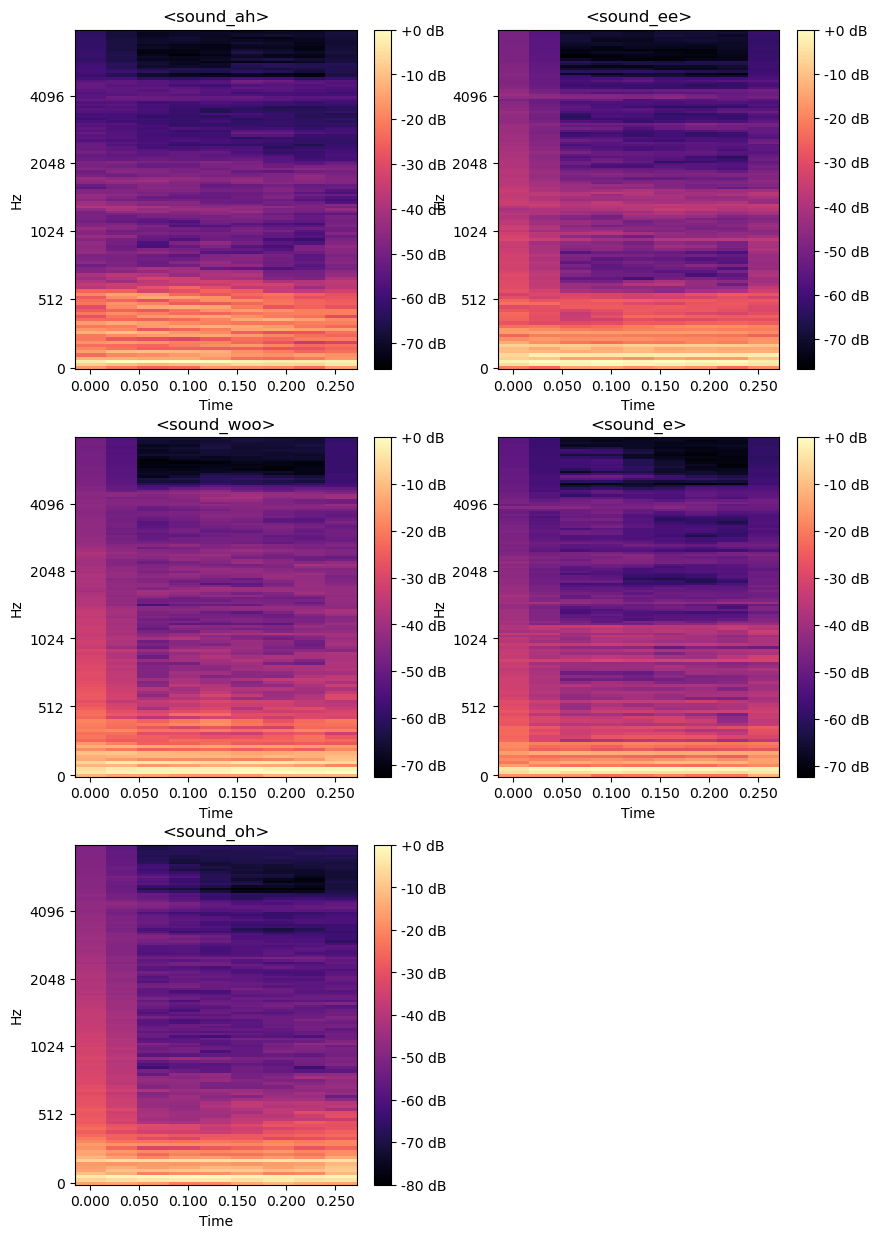

In [116]:
sounds = [sound_ah, sound_ee, sound_woo, sound_e, sound_oh]
sounds_title = ['<sound_ah>', '<sound_ee>', '<sound_woo>', '<sound_e>', '<sound_oh>']

plt.figure(figsize = (10, 15))

for i, sound, title in zip(range(1, 6), sounds, sounds_title):
    D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
    mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
    mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    plt.subplot(3, 2, i)
    librosa.display.specshow(mel_db, sr=file_sampling_rate, x_axis='time', y_axis='mel') # y_axis 바뀜
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    
plt.show()

일정한 음을 냈다고 하면 크기가 쭉 같았을텐데, 처음쪽이 큰 것을 볼 수 있다.  
이 또한 개개인의 목소리의 특징  

# 음성 조합

## 아이 만들기

sound_ah : 아  
sound_ee : 이  

In [8]:
import soundfile
import numpy as np

ah_200ms = np.append(sound_ah, sound_ah, axis = 0)
ee_200ms = np.append(sound_ee, sound_ee, axis = 0)
ahee_400ms_con = np.append(ah_200ms, ee_200ms, axis = 0)
soundfile.write('ahee_400ms.wav', ahee_400ms, format='WAV', samplerate = sample_rate)

NameError: name 'sound_ah' is not defined

In [151]:
ahee_400ms_con, sr = soundfile.read('ahee_400ms.wav')
IPython.display.Audio(ahee_400ms*1, rate = sr)

## 직접 녹음해 본 것

In [12]:
import soundfile
import IPython

ahee_400ms_jonghyuk, sr = soundfile.read('ahee_by_jonghyuk.wav')
IPython.display.Audio(ahee_400ms_jonghyuk, rate = sr)

## 비교

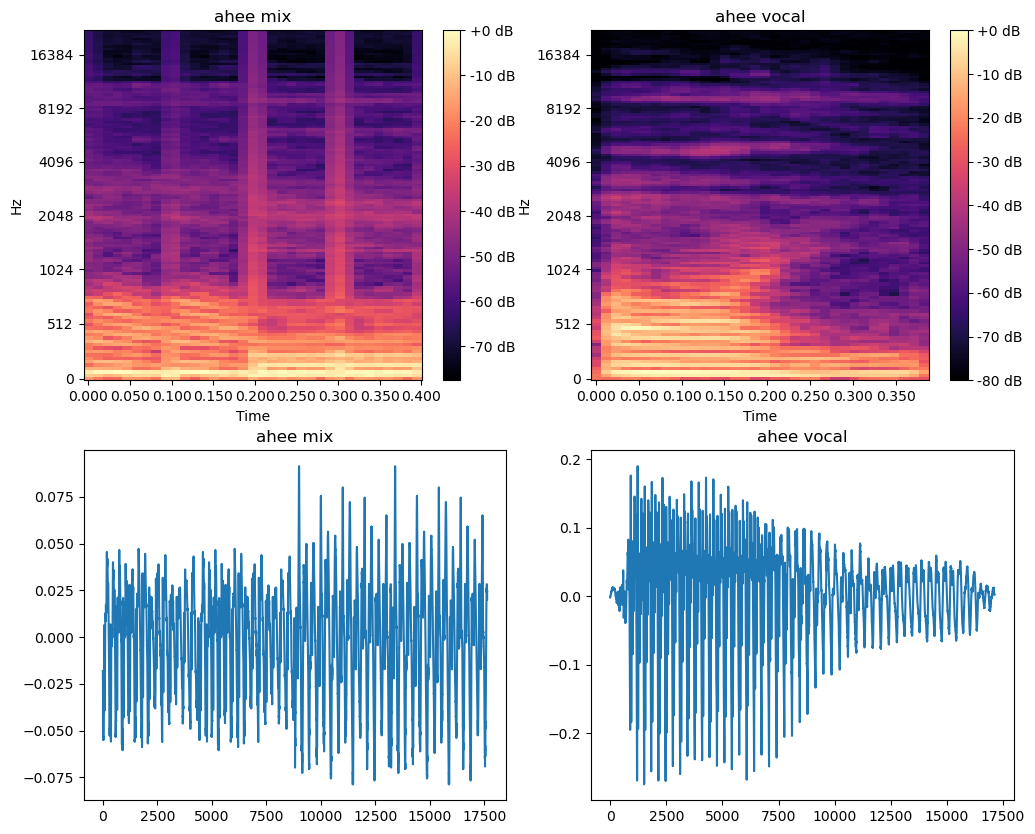

In [158]:
plt.figure(figsize = (12, 10))


# 조합 아이 melspec
D = abs(librosa.stft(ahee_400ms_con)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2, 2, 1)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee mix')
plt.colorbar(format='%+2.0f dB')


# 음성 아이 melspec
D = abs(librosa.stft(ahee_400ms_jonghyuk)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2, 2, 2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# 조합 아이 plot
plt.subplot(2, 2, 3)
leng_temp = int(len(ahee_400ms_con))
plt.title('ahee mix')
plt.plot(range(leng_temp), ahee_400ms_con)

# 음성 아이 plot
plt.subplot(2, 2, 4)
leng_temp = int(len(ahee_400ms_jonghyuk))
plt.title('ahee vocal')
plt.plot(range(leng_temp), ahee_400ms_jonghyuk)
plt.show()

# I Love you (papago)

* iloveyou_papago : 파파고 재생 소리(원래 음원)  
* sound_lov : 조합한 소리  
* 

## 원 음성 뜯어보기

In [166]:
# 음성 파일 불러오기  
# tts 파일 인터셉트 : https://m.blog.naver.com/leee0000/221967416037
iloveyou_papago , sr = soundfile.read('iloveyou_papago.wav')
IPython.display.Audio(iloveyou_papago, rate = sr)

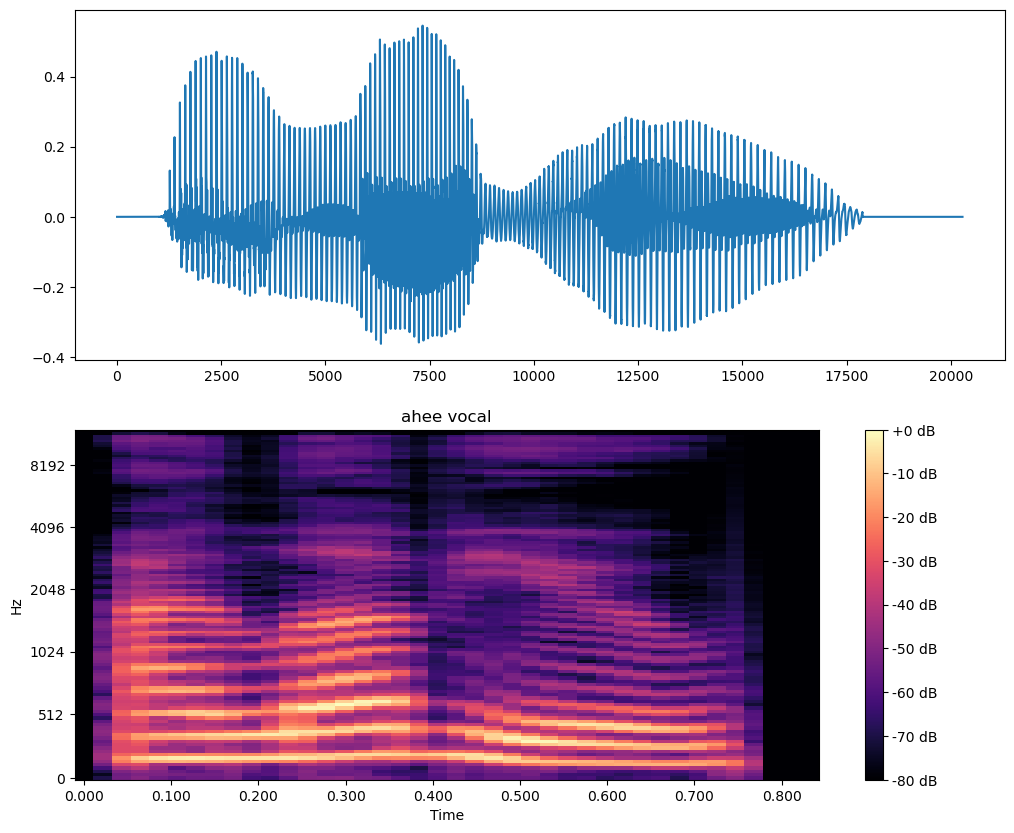

In [214]:
# 전체 iloveyou

sound = iloveyou_papago
plt.figure(figsize = (12, 10))

# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound)), sound)

# mel
D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# result
sound_iloveyou = sound

# sound
IPython.display.Audio(sound, rate = sr)

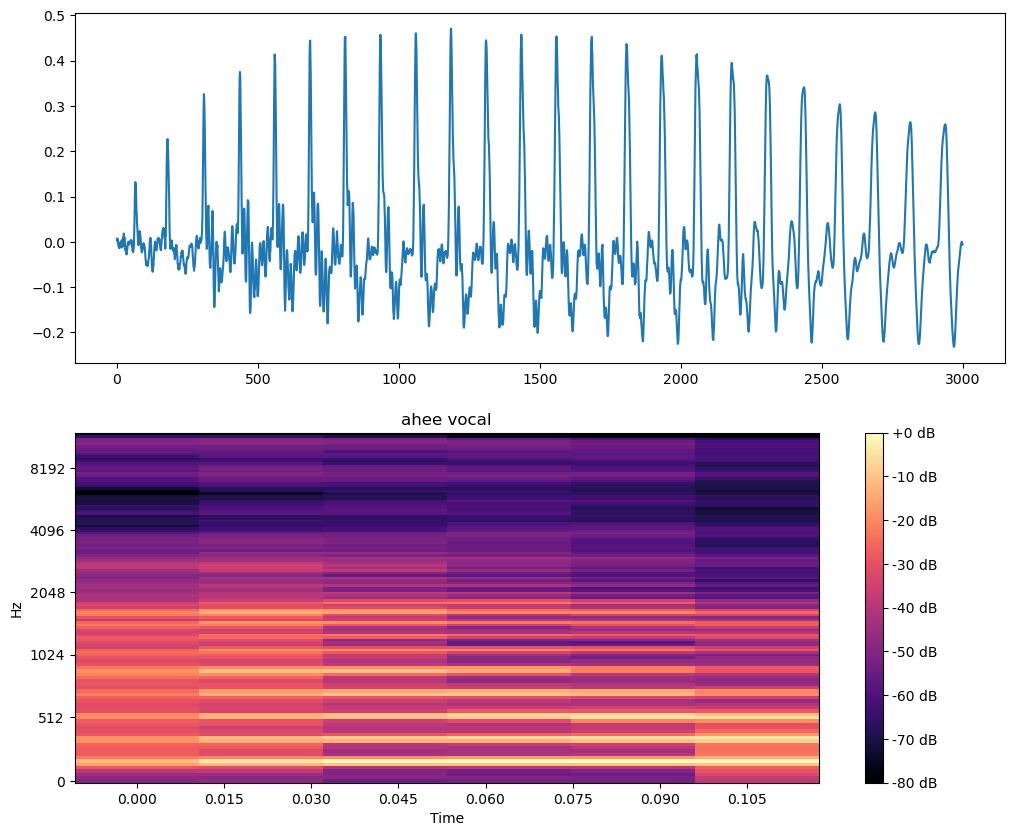

In [215]:
start = 1200
leng = 3000
sound = iloveyou_papago[int(start):int(start + leng)]

plt.figure(figsize = (12, 10))

# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound)), sound)

# mel
D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# result
sound_i = sound

# sound
IPython.display.Audio(sound, rate = sr)

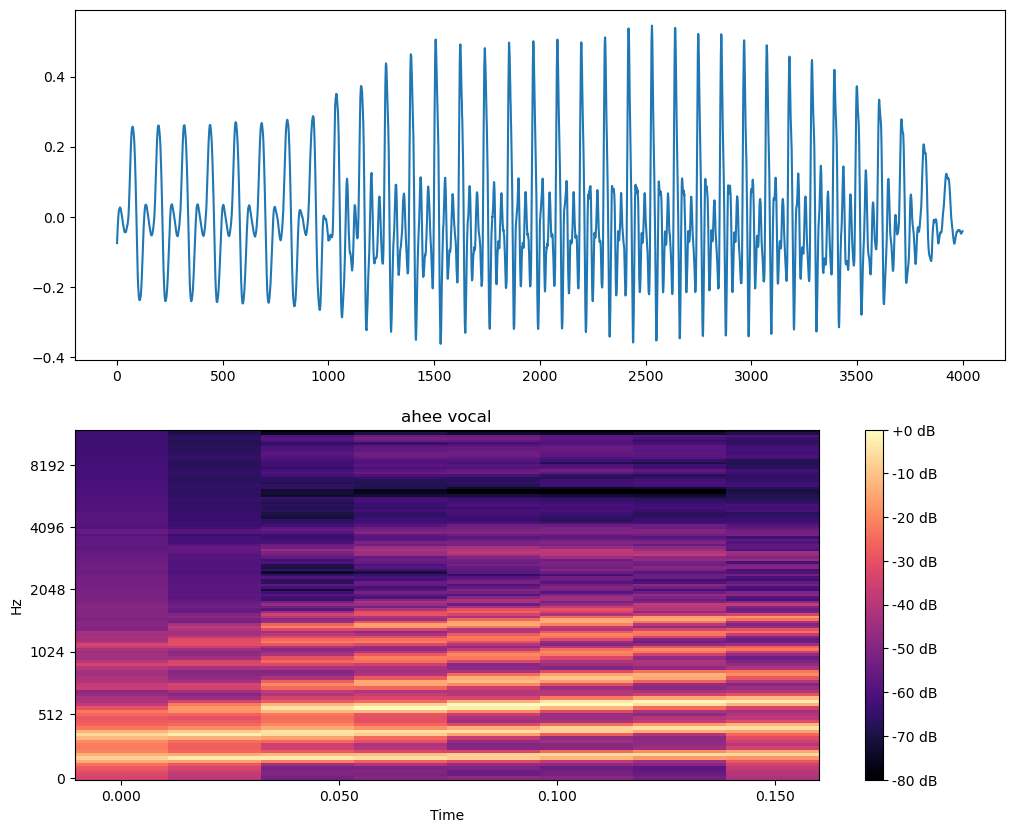

In [216]:
start = sr * 0.2
leng = sr / 6
sound = iloveyou_papago[int(start):int(start + leng)]

plt.figure(figsize = (12, 10))

# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound)), sound)

# mel
D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# result
sound_lov = sound

# sound
IPython.display.Audio(sound, rate = sr)

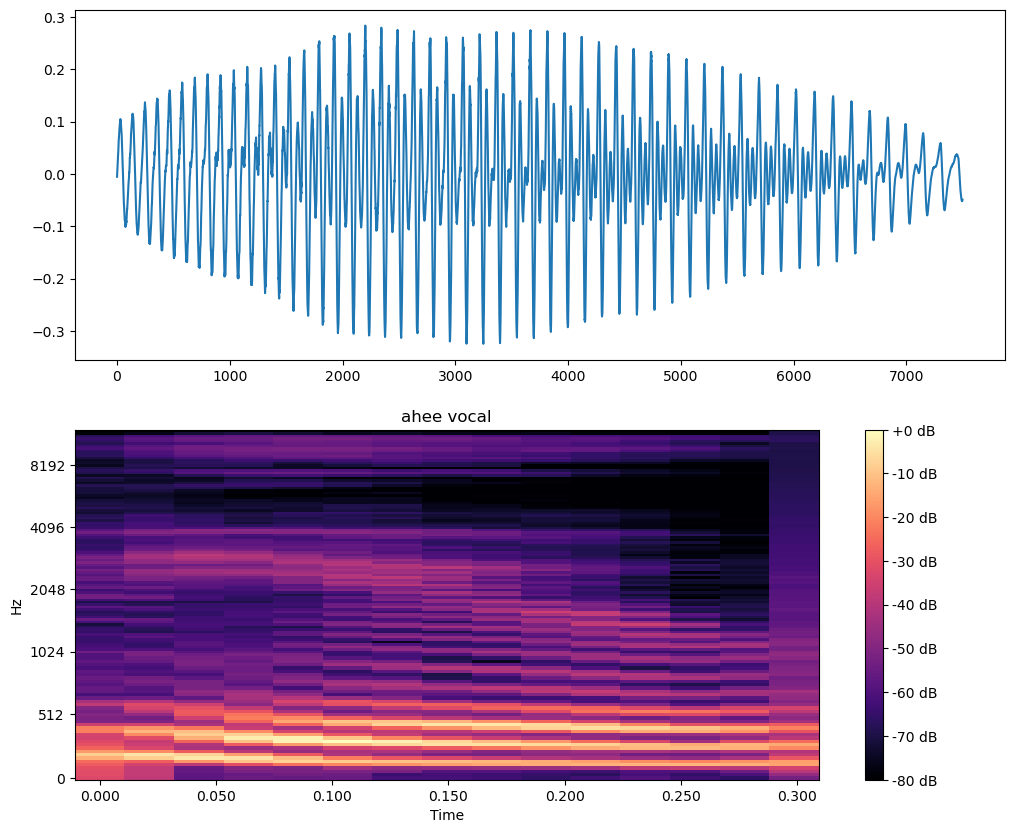

In [217]:
start = 10000
leng = 7500
sound = iloveyou_papago[int(start):int(start + leng)]

plt.figure(figsize = (12, 10))

# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound)), sound)

# mel
D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# result
sound_you = sound

# sound
IPython.display.Audio(sound, rate = sr)

## Love 만들어보기

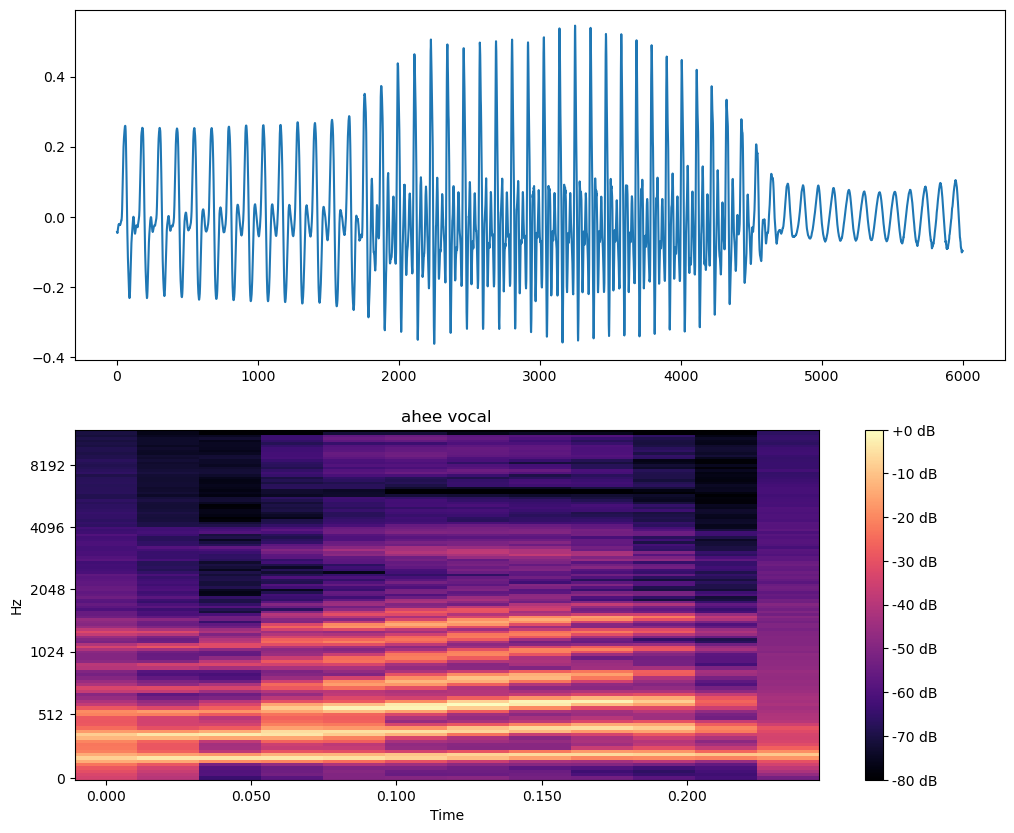

In [222]:
start = sr * 0.17
leng = sr / 4
sound = iloveyou_papago[int(start):int(start + leng)]

plt.figure(figsize = (12, 10))

# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound)), sound)

# mel
D = abs(librosa.stft(sound)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# result
sound_lov = sound

# sound
IPython.display.Audio(sound, rate = sr)

In [261]:
# 발음 추출

# sound_L = sound_lov[400:650] # 250 (400 ~ 1400)
# sound_O = sound_lov[2000:2250] # 250 (2000 ~ 3000)
# sound_V = sound_lov[4400:4650] # 250 (4400 ~ 5400)

sound_L = sound_lov[400:900] # 250 (400 ~ 1400)
sound_O = sound_lov[2000:2500] # 250 (2000 ~ 3000)
sound_V = sound_lov[4500:5000] # 250 (4400 ~ 5400)

IPython.display.Audio(sound_V, rate = sr)

In [262]:
# 합성

sound_L = np.append(np.append(np.append(sound_L, sound_L), sound_L), sound_L)
sound_L = np.append(sound_L, sound_L)
# sound_L = np.append(sound_L, sound_L)
sound_L = np.append(sound_L, sound_L[:410])
sound_O = np.append(np.append(np.append(sound_O, sound_O), sound_O), sound_O)
sound_O = np.append(sound_O, sound_O)
# sound_O = np.append(sound_O, sound_O)
sound_O = np.append(sound_O, sound_O[:410])
sound_V = np.append(np.append(np.append(sound_V, sound_V), sound_V), sound_V)
sound_V = np.append(sound_V, sound_V)
# sound_V = np.append(sound_V, sound_V)
sound_V = np.append(sound_V, sound_V[:410])

sound_lov_mix = np.append(np.append(sound_L, sound_O), sound_V)
IPython.display.Audio(sound_lov_mix, rate = sr)

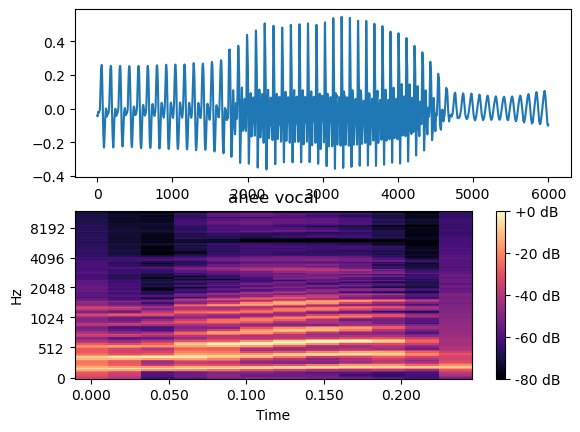

In [263]:
# plot
plt.subplot(2,1,1)
plt.plot(range(len(sound_lov)), sound_lov)

# mel
D = abs(librosa.stft(sound_lov)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2,1,2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# Melspec To Audio

Melspec을 오디오 데이터로 바꿔주는 라이브러리

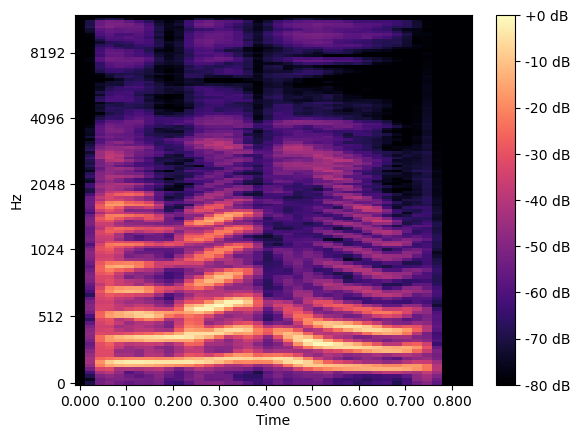

In [296]:
# 먼저, 음원을 멜스펙으로 변환
iloveyou_papago , sr = soundfile.read('iloveyou_papago.wav')

# mel
D = abs(librosa.stft(iloveyou_papago)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.colorbar(format='%+2.0f dB')

restored_iloveyou = librosa.feature.inverse.mel_to_audio(mel_spec)
IPython.display.Audio(restored_iloveyou, rate=sr)

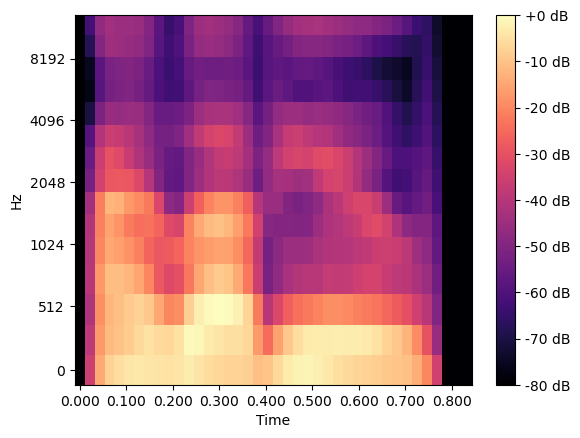

In [301]:
# 먼저, 음원을 멜스펙으로 변환
iloveyou_papago , sr = soundfile.read('iloveyou_papago.wav')

# mel
D = abs(librosa.stft(iloveyou_papago))
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=15) # 단계 수를 줄이면 더 이상해진다.
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') 
plt.colorbar(format='%+2.0f dB')

restored_iloveyou = librosa.feature.inverse.mel_to_audio(mel_spec)
IPython.display.Audio(restored_iloveyou, rate=sr)

## 왜 기계음처럼 들리는가?
들어보면 기계음처럼 들리는 것을 알 수 있다. 
이는 '위상'이 없어졌기 때문이다.  

음성 데이터는 위상을 표현하는 '허수'가 들어있으며, 이 때문에 복소수로 표현된다.  
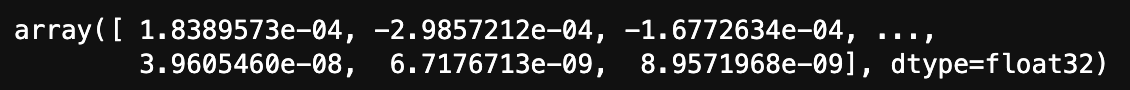  

melspec을 할 때 오일러공식을 통한 변환으로 허수를 잃게 되면서 (맞나??)  


In [273]:
# 복소수 : 실수와 허수로 이루어진 수  
# 연산 자체는 가능해진다.  

num1 = 3 + 4j
num2 = 5 + 6j
num3 = num1 + num2
num3

(8+10j)

In [275]:
# 하지만 c언어는 허수를 변수로 넣지 못한다.  
# 따라서... 아래와 같이 나눠 계산해야 했다고 함.  

num1_real = 3
num1_image = 4
num2_real = 5
num2_image = 6
num3_real = num1_real + num2_real
num3_image = num1_image + num2_image
print(f'실수부 : {num3_real}, 허수부 : {num3_image}')

실수부 : 8, 허수부 : 10


더하기만 해도 이렇게 복잡해지는데..  
곱하기, 그리고 복잡한 오일러 공식을 적용해야한다면.. 끔찍하다.  

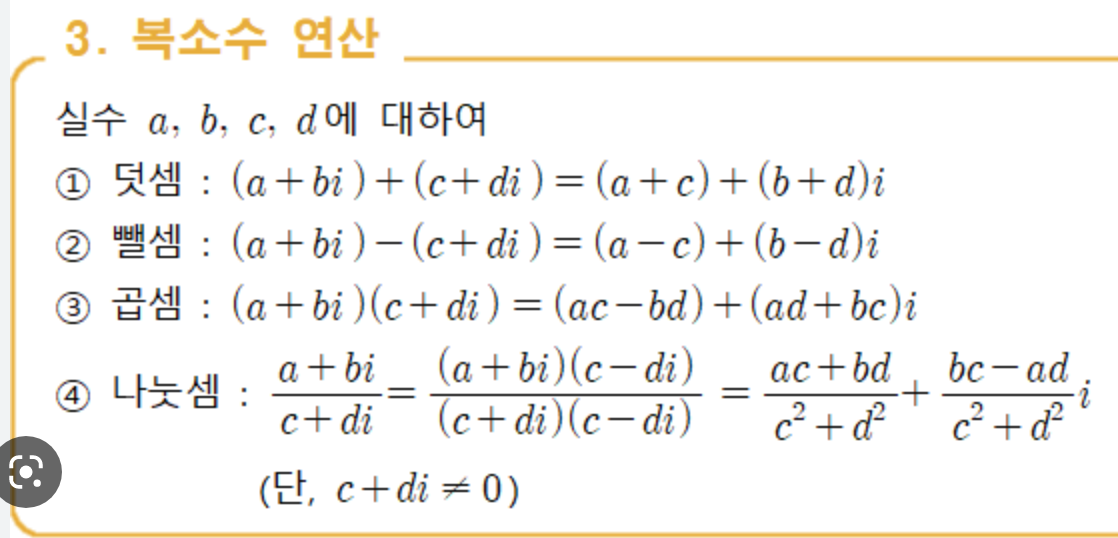

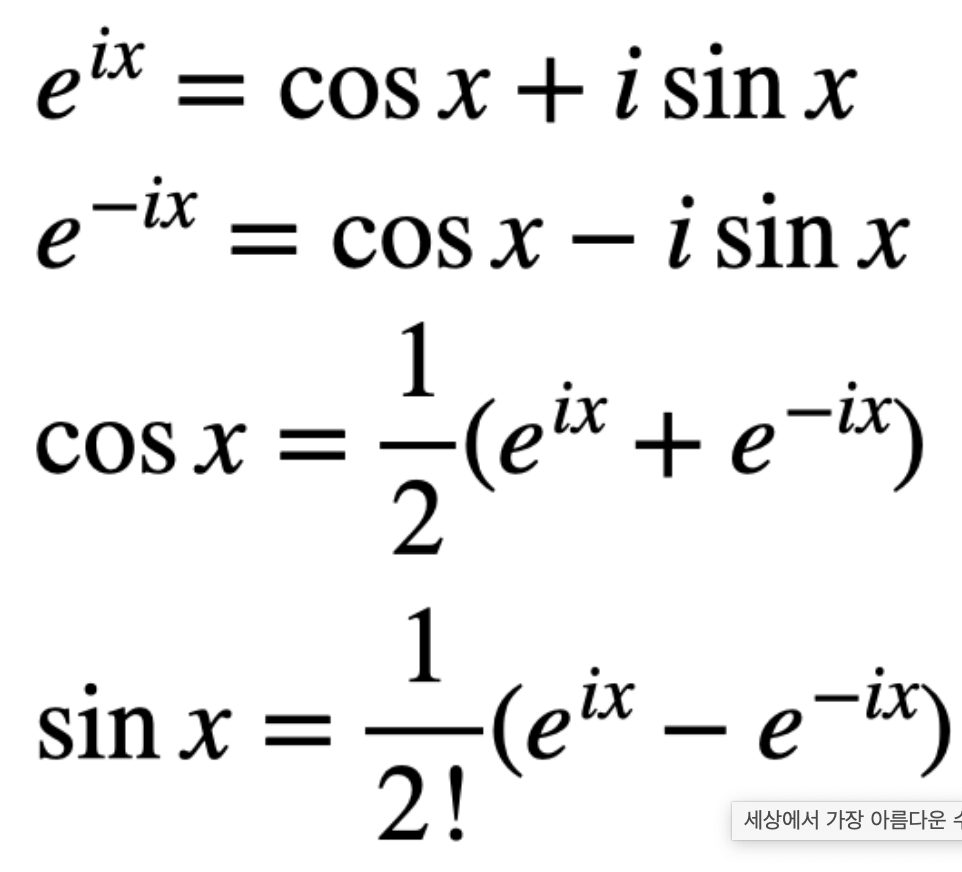

In [278]:
# 그래서, 절대값을 취해 계산을 간단히 하자는 (산업계의?) 결론이 나왔다.
# 그런데...

## 방법 1
num1 = abs(3 + 4j)
num2 = abs(5 + 6j)
num3 = num1 + num2
print(num3)

## 방법 2
num4 = abs(8 + 10j)
print(num4)

12.810249675906654
12.806248474865697


## 신호에 절대값을 취해버리면

* 위상이 사라지게 된다.

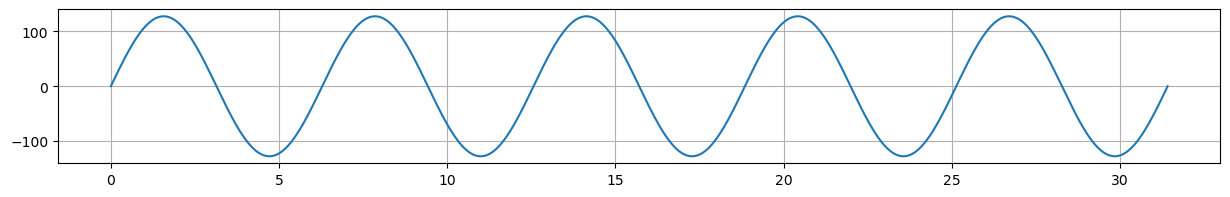

In [282]:
# 원 신호가 아래와 같은 sin 신호라고 해보자.
X_analog = np.linspace(0, 5*2*np.pi, 1000)
y_analog = np.sin(X_analog) * 255.0/2.0

plt.figure(figsize = (15, 2))
plt.plot(X_analog, y_analog)
plt.grid()
plt.show()

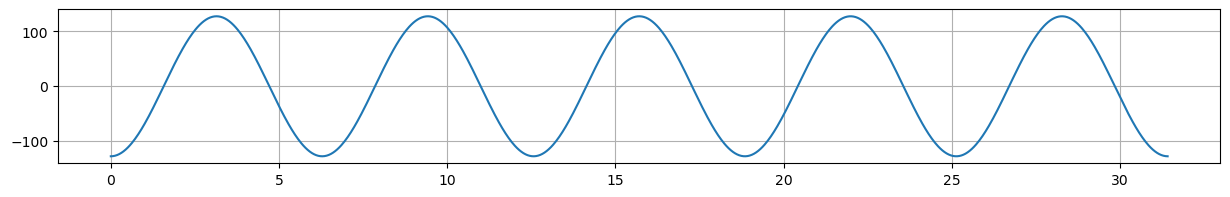

In [288]:
# 여기서 각도 90도를 돌린 (-0.5) sin파를 그려본다.
# 이를 두고 원음과 90도의 위상차를 나타낸다고 한다.
# 이때까지는 서로 다른 신호로 보인다.
X_analog = np.linspace(0, 5*2*np.pi, 1000)
y_analog = np.sin(X_analog - 0.5*np.pi) * 255.0/2.0

plt.figure(figsize = (15, 2))
plt.plot(X_analog, y_analog)
plt.grid()
plt.show()

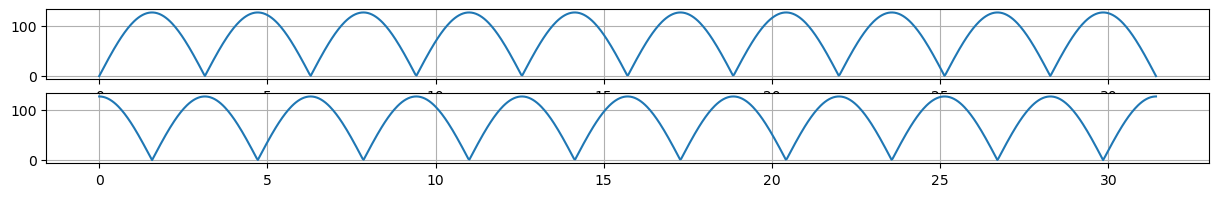

In [289]:
X_analog = np.linspace(0, 5*2*np.pi, 1000)
y_analog = abs(np.sin(X_analog) * 255.0/2.0)

plt.figure(figsize = (15, 2))
plt.subplot(2, 1, 1)
plt.plot(X_analog, y_analog)
plt.grid()

X_analog = np.linspace(0, 5*2*np.pi, 1000)
y_analog = abs(np.sin(X_analog - 0.5*np.pi) * 255.0/2.0)

plt.subplot(2, 1, 2)
plt.plot(X_analog, y_analog)
plt.grid()

plt.show()

* 의문.. 근데 그러면 melspec을 위상을 포함해서, 복소수로 하면 안되나..?

## 그래서 나온 해결책이 : GAN을 사용하자

# GAN

* GAN이란?  
* 적대적 생성 신경망  

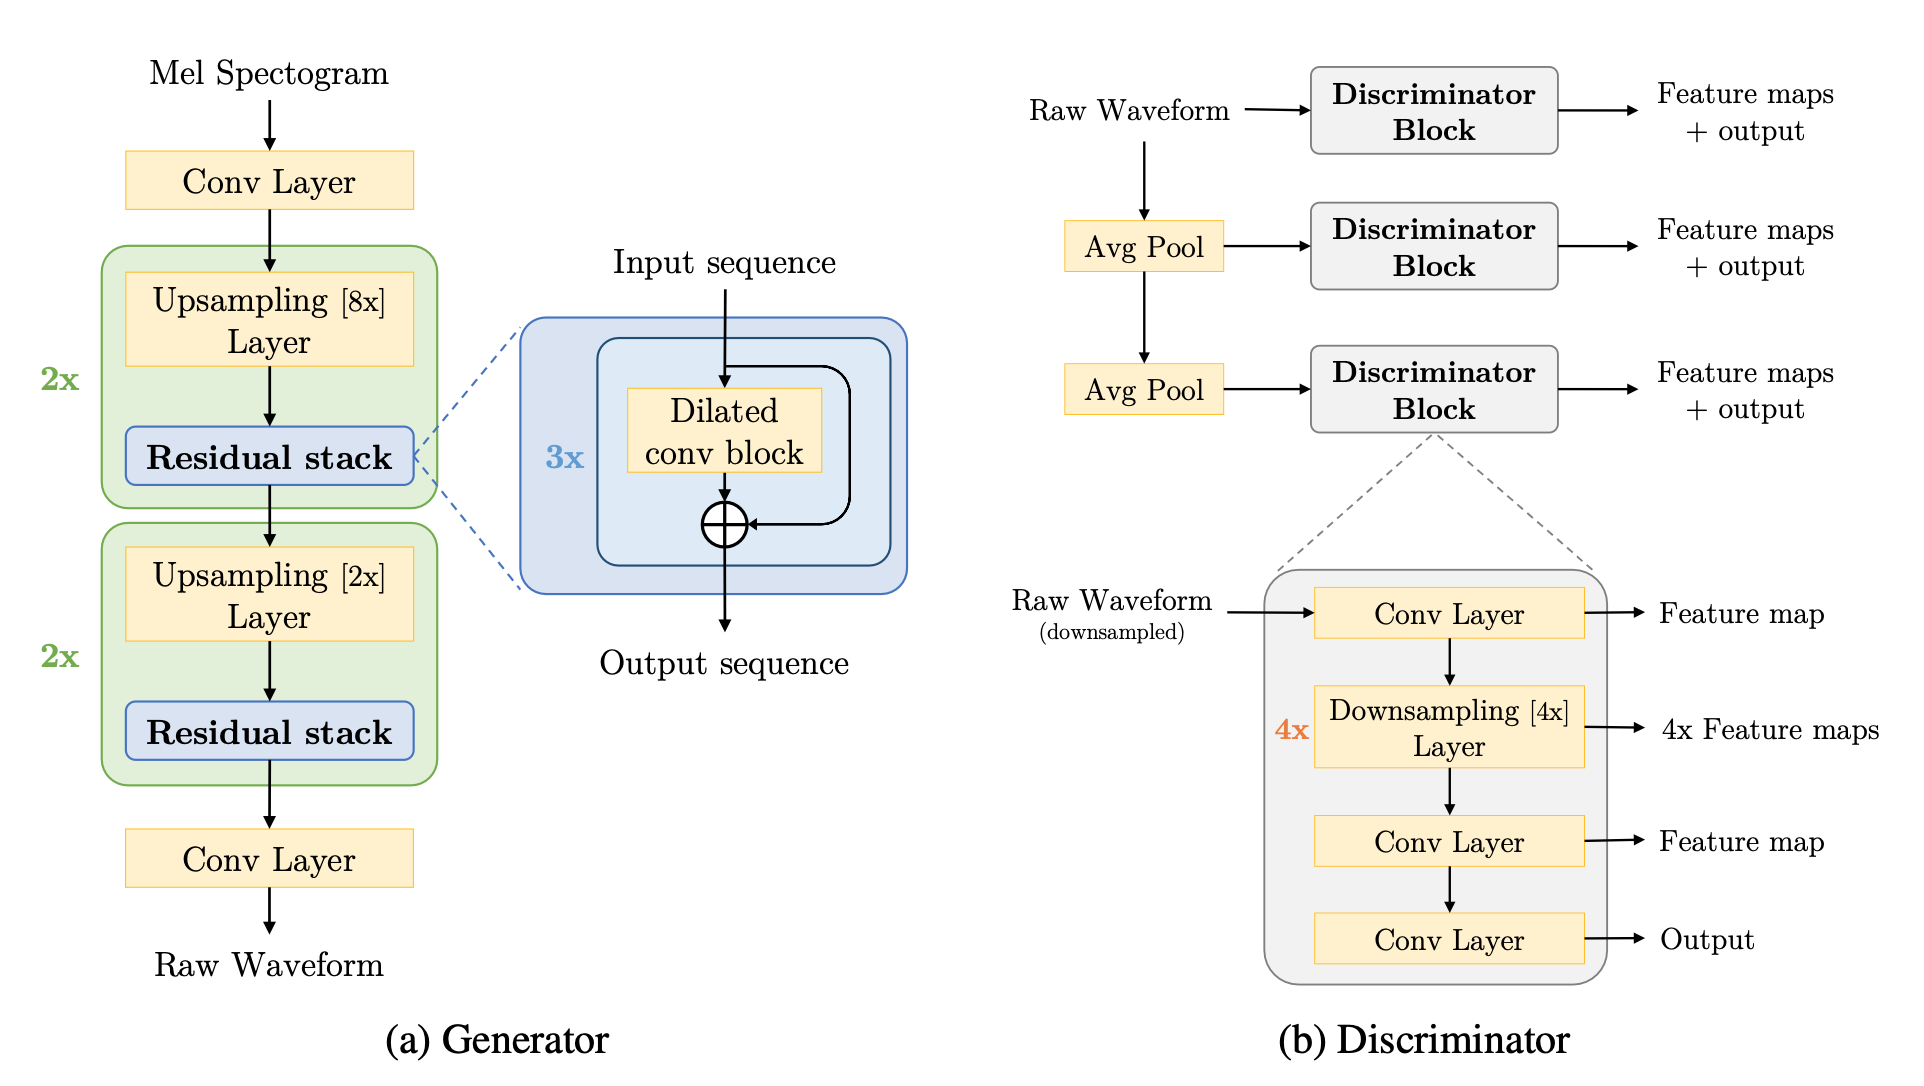

* GAN은 강화학습의 일종.  
* 강화학습이란 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법  
https://ko.wikipedia.org/wiki/%EA%B0%95%ED%99%94_%ED%95%99%EC%8A%B5  

## 참고 : 음성 이어붙이기 numpy.append()

https://pasus.tistory.com/107

# 음성으로 사람 구분해보기

In [303]:
iloveyou_papago, sr_papago = soundfile.read('iloveyou_papago.wav')
iloveyou_kakao, sr_kakao = soundfile.read('iloveyou_kakao.mp3')

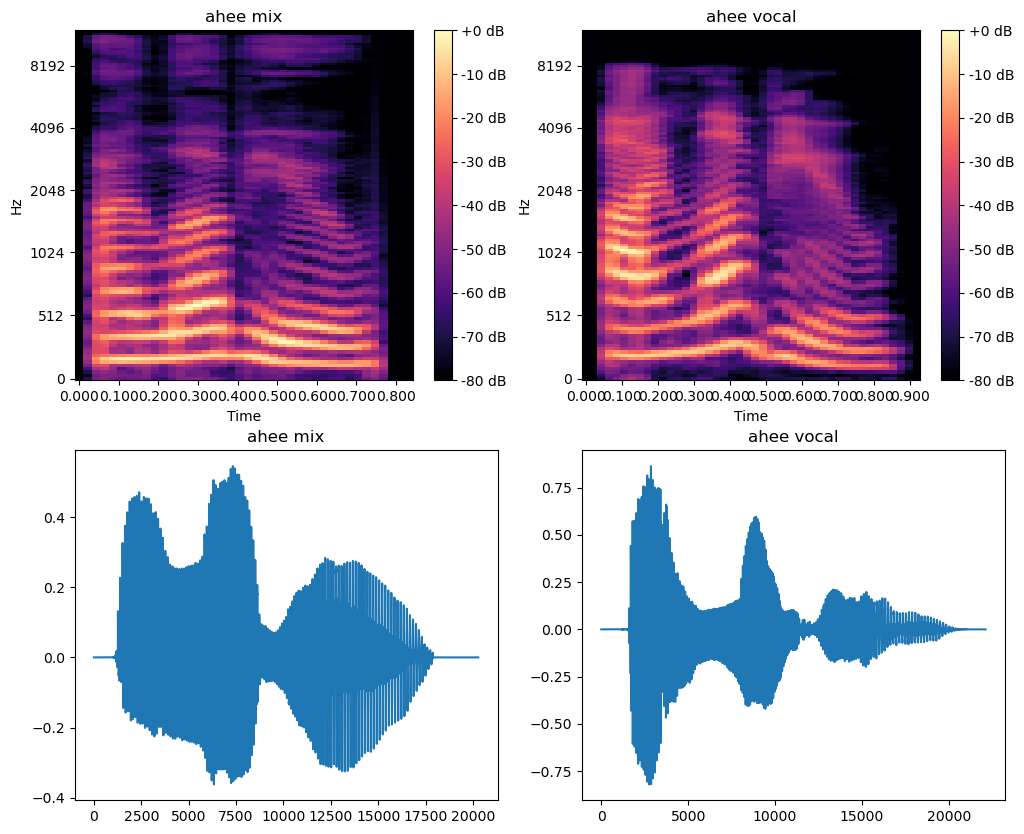

In [305]:
plt.figure(figsize = (12, 10))


# 조합 아이 melspec
D = abs(librosa.stft(iloveyou_papago)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2, 2, 1)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee mix')
plt.colorbar(format='%+2.0f dB')


# 음성 아이 melspec
D = abs(librosa.stft(iloveyou_kakao)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=128) # 128단계 melspectrogram 구하기
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.subplot(2, 2, 2)
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('ahee vocal')
plt.colorbar(format='%+2.0f dB')

# 조합 아이 plot
plt.subplot(2, 2, 3)
leng_temp = int(len(iloveyou_papago))
plt.title('ahee mix')
plt.plot(range(leng_temp), iloveyou_papago)

# 음성 아이 plot
plt.subplot(2, 2, 4)
leng_temp = int(len(iloveyou_kakao))
plt.title('ahee vocal')
plt.plot(range(leng_temp), iloveyou_kakao)
plt.show()

어느정도 차이를 보인다.  
그러므로 CNN 등을 이용해 분류가 가능할 것임